## Some Visualizations for the Earth Mover's Distance
see [Wasserstein GAN and the Kantorovich-Rubinstein duality]()

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

P_r:


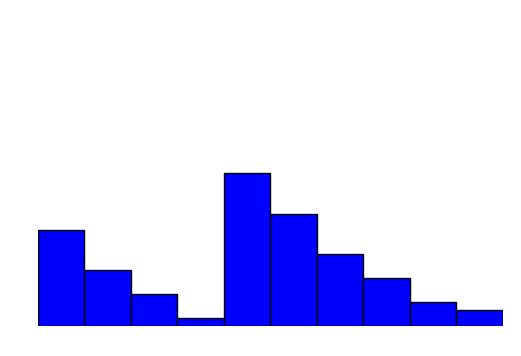

P_t:


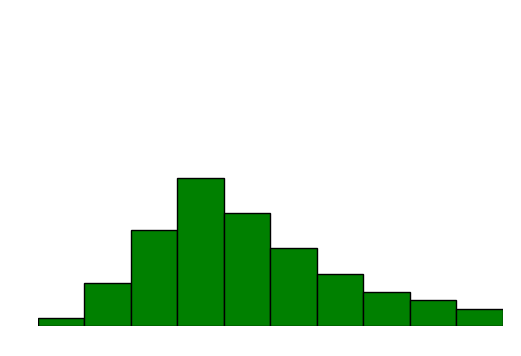

In [60]:
l = 10

P_r = np.array([12,7,4,1,19,14,9,6,3,2])
P_t = np.array([1,5,11,17,13,9,6,4,3,2])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)

plt.bar(range(l), P_r, 1, color='blue', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
plt.savefig("discrete_p_r.svg")
print("P_r:")
plt.show()

plt.bar(range(l), P_t, 1, color='green', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
plt.savefig("discrete_p_t.svg")
print("P_t:")
plt.show()

In [69]:
D = np.ndarray(shape=(l, l))

for i in range(l):
	for j in range(l):
		D[i,j] = abs(range(l)[i] - range(l)[j])

A_r = np.zeros((l, l, l))
A_t = np.zeros((l, l, l))

for i in range(l):
	for j in range(l):
		A_r[i, i, j] = 1
		A_t[i, j, i] = 1
		
A = np.concatenate((A_r.reshape((l, l**2)), A_t.reshape((l, l**2))), axis=0)
print("A: \n", A, "\n")

b = np.concatenate((P_r, P_t), axis=0)
c = D.reshape((l**2))

A: 
 [[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]] 



EMD:  0.706237424547 

Gamma:


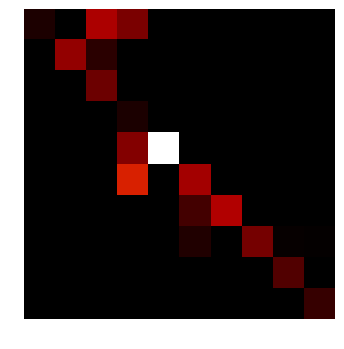

D:


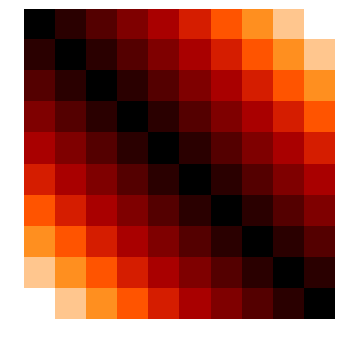

In [71]:
from scipy.optimize import linprog
from matplotlib import cm

opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])
emd = opt_res.fun
gamma = opt_res.x.reshape((l, l))
print("EMD: ", emd, "\n")

plt.imshow(gamma, cmap=cm.gist_heat, interpolation='nearest')
plt.axis('off')
plt.savefig("transport_plan.svg")
print("Gamma:")
plt.show()

plt.imshow(D, cmap=cm.gist_heat, interpolation='nearest')
plt.axis('off')
plt.savefig("distances.svg")
print("D:")
plt.show()

dual EMD:  0.706237424547
f: 
 [ 1.  0. -1. -2. -1.  0.  1.  2.  1.  0.]


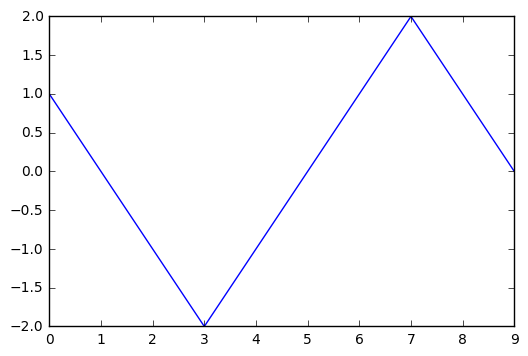

g: 
 [ 1.  0. -1. -2. -1.  0.  1.  2.  1.  0.]


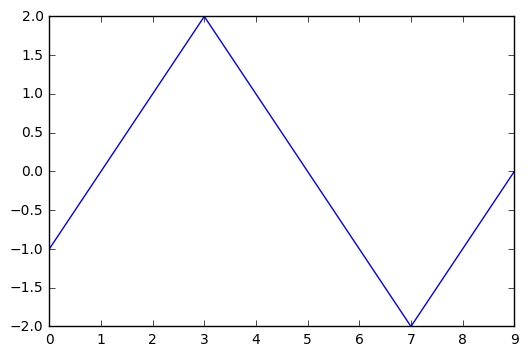

In [72]:
# linprog() can only minimize the cost, because of that
# we optimize the negative of the objective. Also, we are
# not constrained to nonnegative values.
opt_res = linprog(-b, A.T, c, bounds=(None, None))

emd = -opt_res.fun
f = opt_res.x[0:l]
g = opt_res.x[l:]

#print(dual_result)
print("dual EMD: ", emd)

print("f: \n", f)
plt.plot(range(l), f)
plt.savefig("f_function.svg")
plt.show()


print("g: \n", f)
plt.plot(range(l), g)
plt.show()

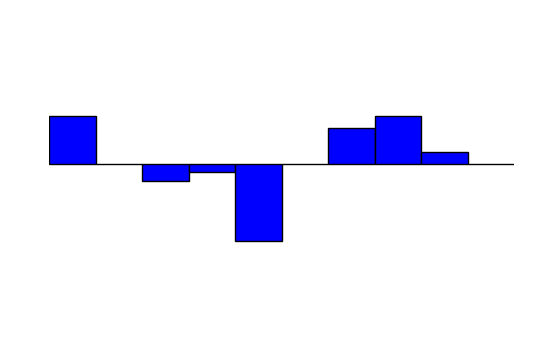

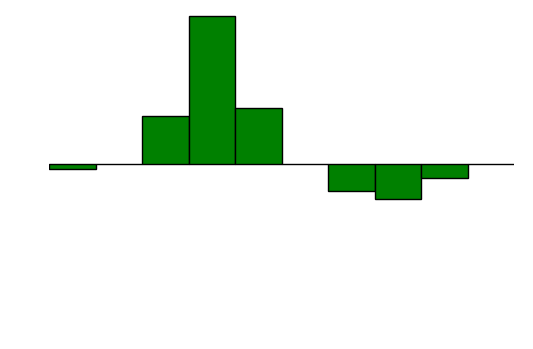

emd:  0.706237424547


In [75]:
plt.bar(range(l), np.multiply(P_r, f), 1, color='blue', alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
plt.savefig("p_r_f-scaled.svg")
plt.show()

plt.bar(range(l), np.multiply(P_t, g), 1, color='green', alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
plt.savefig("p_t_f-scaled.svg")
plt.show()

#check sum
emd = np.sum(np.multiply(P_r, f)) + np.sum(np.multiply(P_t, g))
print("emd: ", emd)

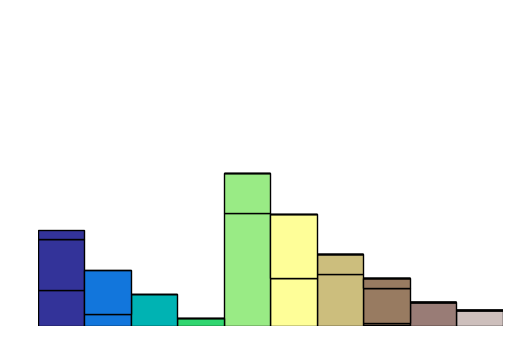

In [76]:
import matplotlib.colors as colors

cNorm = colors.Normalize(vmin=0, vmax=l)
colorMap = cm.ScalarMappable(norm=cNorm, cmap=cm.terrain)

current_bottom = np.zeros(l)

for i in r.__reversed__():
	plt.bar(r, gamma[r, i], 1, color=colorMap.to_rgba(r), bottom=current_bottom)
	current_bottom = current_bottom + gamma[r, i]

plt.axis('off')
plt.ylim(0, 0.5)
plt.savefig("earth_move_p_r.svg")
plt.show()

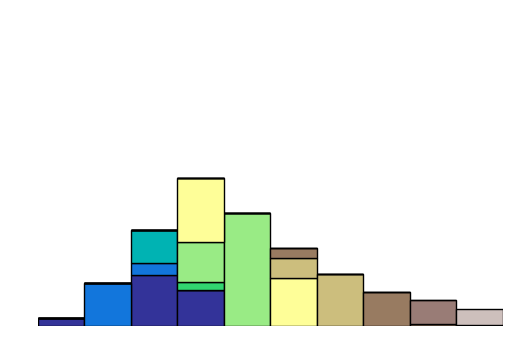

In [77]:
current_bottom = np.zeros(l)
r = range(l)

for i in r:
	plt.bar(r, gamma[i, r], 1, color=colorMap.to_rgba(i), bottom=current_bottom)
	current_bottom = current_bottom + gamma[i, r]

plt.axis('off')
plt.ylim(0, 0.5)
plt.savefig("earth_move_p_t.svg")
plt.show()